# Investigar  los patrones de la rentabilidad de los productos de Whitewell

El algoritmo produce una función que establece una correspondencia entre las entradas y las salidas deseadas del sistema. Un ejemplo de este tipo de algoritmo es el problema de clasificación, donde el sistema de aprendizaje trata de etiquetar (clasificar) una serie de vectores utilizando una entre varias categorías (clases). La base de conocimiento del sistema está formada por ejemplos de etiquetados anteriores.

- Arboles de decision

### Autores
   * Efrén Jiménez

## Análisis del Problema

Whitewell ha sido un exitoso minorista de productos electrónicos durante más de 40 años, con más de 30 tiendas en el sudeste. Hace poco más de un año lanzo un nuestro sitio web de comercio electrónico. Estamos comenzando a acumular datos de transacciones de clientes del sitio y queremos aprovechar estos datos para informar nuestras decisiones sobre actividades relacionadas con el sitio, como marketing en línea, mejoras en el sitio, etc., para continuar maximizando la cantidad de ingresos que generamos de las ventas de comercio electrónico.

- ¿Los clientes en diferentes regiones gastan más por transacción? 
- ¿Qué regiones gastan más / menos?
- ¿Existen diferencias en la edad de los clientes entre regiones? Si es así, ¿podemos predecir la edad de un cliente en una región en función de otros datos demográficos?
- Necesitamos investigar la hipótesis: ¿Existe alguna correlación entre la edad de un cliente y si la transacción se realizó en línea o en la tienda? ¿Algún otro factor predice si un cliente comprará en línea o en nuestras tiendas?
- ¿existe una relación entre la cantidad de artículos comprados y la cantidad gastada?

![blackbell](img/blackbell.jpg)

### Librerías

In [65]:
#Manejo de datasets
import pandas as pd
#Manejo de datasets
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
#Gráficos
%matplotlib inline
#Gráficos basados en matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Entendimiento de los Datos

El total es de 10000 registro con 5 columnas dentro del set de datos de Blackwell

- in.store : variable de tipo cualitativa nominal
- age      : variable de tipo cuantitativa discreta   
- items    : variable de tipo cuantitativa discreta  
- amount   : variable de tipo cuantitativa continua  
- region   : variable de tipo cualitativa nominal  

In [3]:
#Cargar los datos
sales = pd.read_csv(r"data/sales.csv")

In [4]:
#Primeros registros
sales.head()

in.store  age  items   amount  region
0         0   60      8  2103.80       3
1         1   58      4   968.38       3
2         0   51      7   143.59       2
3         1   40      7   863.82       3
4         0   41      4   915.21       1

In [5]:
#Describir dataset
sales.describe()

in.store           age        items        amount        region
count  10000.000000  10000.000000  10000.00000  10000.000000  10000.000000
mean       0.455500     45.956500      4.50390    835.000181      2.659700
std        0.498041     15.902261      2.06611    723.099002      1.128904
min        0.000000     18.000000      1.00000      5.230000      1.000000
25%        0.000000     33.000000      3.00000    276.752500      2.000000
50%        0.000000     45.000000      4.00000    570.665000      3.000000
75%        1.000000     57.000000      6.00000   1249.900000      4.000000
max        1.000000     85.000000      8.00000   2999.200000      4.000000

In [6]:
#Información del dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
in.store    10000 non-null int64
age         10000 non-null int64
items       10000 non-null int64
amount      10000 non-null float64
region      10000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


In [7]:
# Numero de registros del dataset
print("Cantidad de registros:",len(sales))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(sales.columns))
# Tipos de datos del dataset
print("Tipo de datos:",sales.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",sales.shape)


Cantidad de registros: 10000
Cantidad de columnas: 5
Tipo de datos: [dtype('int64') dtype('float64')]
Filas y columnas: (10000, 5)


In [8]:
# Chekear valores nulos
print(sales.isnull().any().sum(), ' / ', len(sales.columns))

0  /  5


In [9]:
#Cuales columnnas estas con valores nulos
sales.isnull().sum()[sales.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
sales=sales.dropna() 

In [11]:
sales["in.store"].unique()

array([0, 1], dtype=int64)

In [12]:
sales['in.store'].value_counts(normalize=True)

0    0.5445
1    0.4555
Name: in.store, dtype: float64

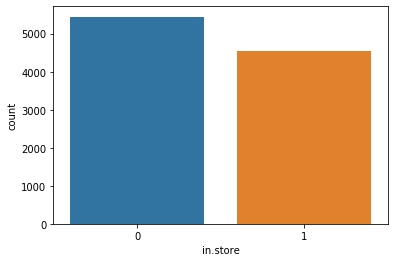

In [13]:
sns.countplot(sales['in.store'])

## Exploración de los Datos

#### Gráficos exploratorios

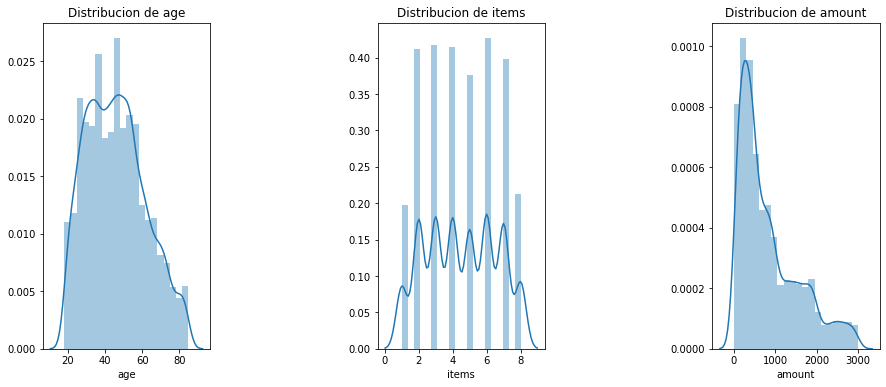

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age' , 'items' , 'amount']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(sales[x] , bins = 20)
    plt.title('Distribucion de {}'.format(x))
plt.show()

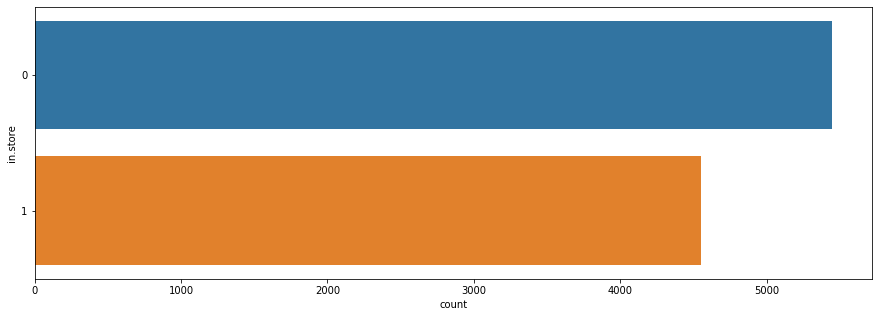

In [15]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'in.store' , data = sales)
plt.show()

Corelacciones entre las variables

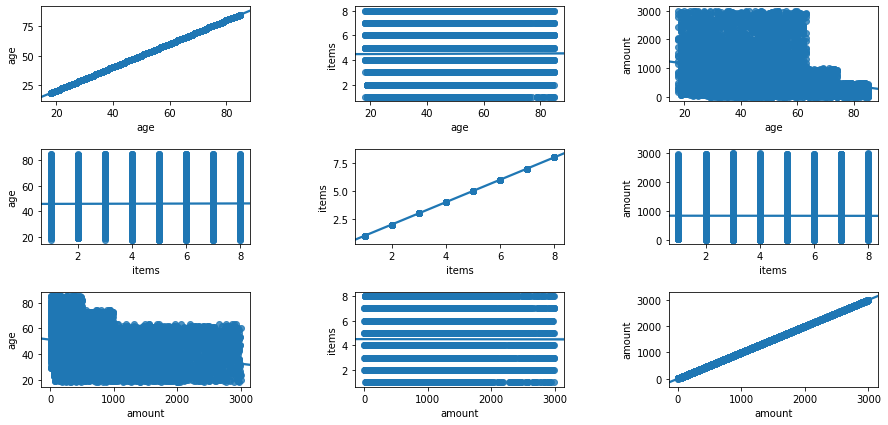

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['age' , 'items' , 'amount']:
    for y in ['age' , 'items' , 'amount']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = sales)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [17]:
sales['tipo_edad'] = np.select(
        [
            sales['age'] <18,
            (sales['age'] >18) & (sales['age']< 65),
            sales['age'] >65,
        ],
        [
            'menor',
            'joven',
            'adulto'
        ]
    )

Text(0.5, 1.0, 'Personas segun la edad de compra')

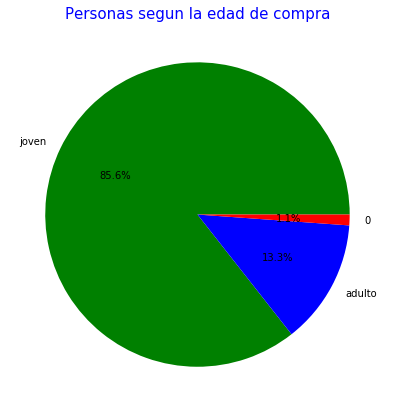

In [18]:
labels = sales.tipo_edad.value_counts().index
colors = ['green','blue','red']
explode = [0,0,0]
sizes = sales.tipo_edad.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Personas segun la edad de compra',color = 'blue',fontsize = 15)

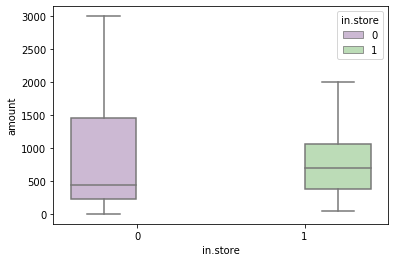

In [19]:
sns.boxplot(x="in.store", y="amount", hue="in.store", data=sales, palette="PRGn")
plt.show()

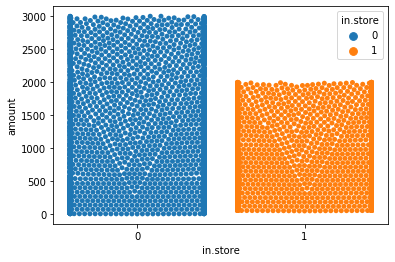

In [20]:
sns.swarmplot(x="in.store", y="amount",hue="in.store", data=sales)
plt.show()

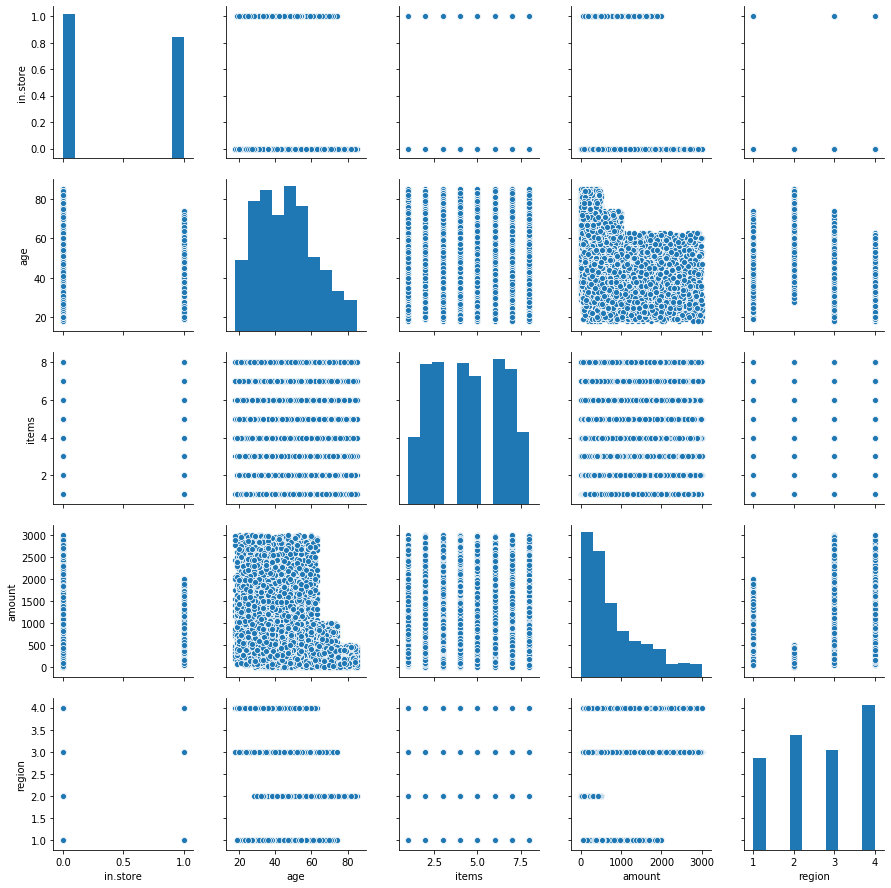

In [21]:
sns.pairplot(sales)
plt.show()

In [28]:
#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales[["age","items","amount","region"]],sales[["in.store"]], test_size=0.3, random_state=1234)

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [ ]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

In [ ]:
print("Pruebas dimensiones",X_test.shape)
print("Descripción")
X_train.describe

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

##### Arbol de desición

In [29]:
#Generar el modelo de regresión lineal
tree = DecisionTreeClassifier()

In [47]:
# Entrenamos nuestro modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = tree.predict(X_test)

In [78]:
predict_values=tree.predict_proba(X_test)
predict_values[:, 1]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Evaluación

In [76]:
matrix=confusion_matrix(y_test, predict_values[:, 1])
matrix

array([[1336,  297],
       [ 362, 1005]], dtype=int64)

In [72]:
auc = roc_auc_score(y_test, predict_values[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.78


In [69]:
fpr, tpr, thresholds = roc_curve(y_test, predict_values)

In [82]:
predict_values[1]

array([1., 0.])

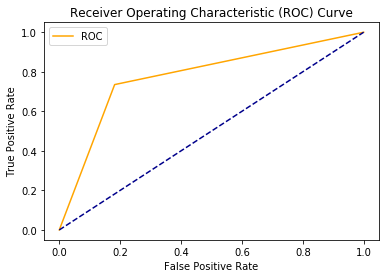

In [83]:
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Calidad del modelo de machine learning

In [99]:
(matrix[[0]][0][0] + matrix[[1]][0][1])/X_test.shape[0]

0.7803333333333333

\begin{equation}Exactitud=\frac{VP+VN}{Total}\end{equation}

In [100]:
(matrix[[0]][0][0])/X_test.shape[0]

0.44533333333333336

\begin{equation}\text{Sensibilidad}=\frac{VP}{\text{Total Positivos}}\end{equation}

In [106]:
(matrix[[0]][0][0])/(matrix[[0]][0][0] + matrix[[1]][0][0])

0.7868080094228505

\begin{equation}\text{Precisión}=\frac{VP}{\text{Total clasificados positivos}}\end{equation}

In [114]:
(matrix[[1]][0][1])/(matrix[[0]][0][1] + matrix[[1]][0][1])

0.771889400921659

\begin{equation}\text{Especificidad}=\frac{VN}{\text{Total Negativos}}\end{equation}

## Resultados
En conclusión, los valores obtenidos por la clasifición verdaderos positivos no son buenos. Por lo cual no se recomienda utilizar este modelo de machine learning.